### Практическое задание

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

import itertools
from tqdm.notebook import tqdm

#### 1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями.

In [2]:
brent_data = pd.read_csv('my_BRENT2019.csv', sep = ',', index_col=[0], parse_dates=[0])
brent_data.rename(columns={'Значение': 'brent'}, inplace=True)
brent_data.head(2)

,brent,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0


In [3]:
brent_data.describe().T

,count,mean,std,min,25%,50%,75%,max
brent,2667.0,81.533547,26.349469,27.85,56.84,77.71,108.19,126.9
year,2667.0,2014.661042,2.663525,2010.00,2012.00,2015.00,2017.00,2019.0
month,2667.0,6.517060,3.430260,1.00,4.00,7.00,9.00,12.0
dayofmonth,2667.0,15.715786,8.780275,1.00,8.00,16.00,23.00,31.0
quarter,2667.0,2.505062,1.112684,1.00,2.00,3.00,3.00,4.0
dayofyear,2667.0,182.901762,104.741067,2.00,92.00,183.00,273.00,366.0
weekofyear,2667.0,26.486689,14.935147,1.00,14.00,27.00,39.00,53.0
dayofweek,2667.0,2.537308,1.894937,0.00,1.00,2.00,4.00,6.0
is_holiday,2667.0,0.027747,0.164277,0.00,0.00,0.00,0.00,1.0
is_prev_holiday,2667.0,0.026997,0.162104,0.00,0.00,0.00,0.00,1.0


Text(0.5, 0, 't')

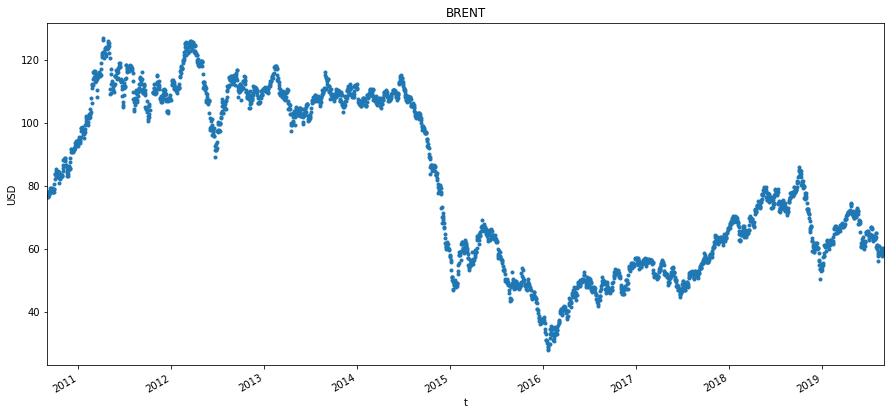

In [4]:
_ = brent_data['brent'].plot(style='.', figsize=(15, 7), title='BRENT')
plt.ylabel('USD')
plt.xlabel('t')

In [5]:
brent_data['brent_diff'] = brent_data['brent'].diff().fillna(0)
brent_data.head(2)

,brent,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,brent_diff
Дата,,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.00
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0.52


Text(0.5, 0, 't')

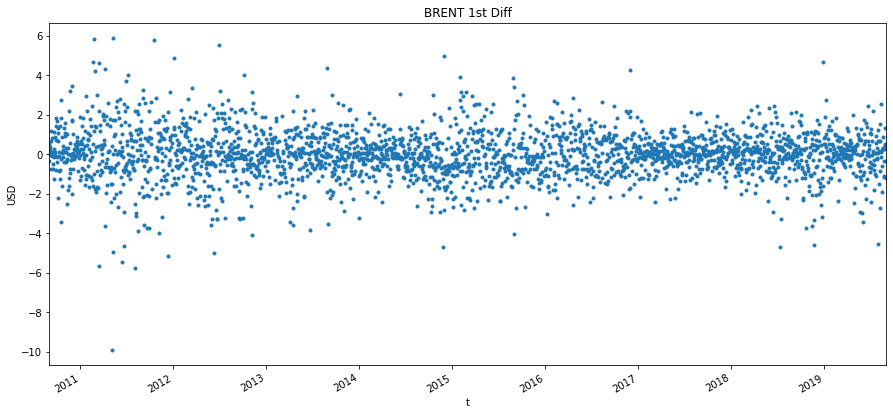

In [6]:
_ = brent_data.iloc[1:, -1].plot(style='.', figsize=(15, 7), title='BRENT 1st Diff')
plt.ylabel('USD')
plt.xlabel('t')

#### 2. Добавьте первые разности по стоимости доллара и евро к рублю.

In [7]:
usd_data = pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx', sep = ',', usecols=[1, 2], index_col=[0], parse_dates=[0])
usd_data.rename(columns={'curs': 'usd_curs'}, inplace=True)
usd_data.head(2)

,usd_curs
data,
2010-09-01,30.8669
2010-09-02,30.8001


In [8]:
usd_data.describe().T

,count,mean,std,min,25%,50%,75%,max
usd_curs,2228.0,48.129075,15.849952,27.2625,31.544075,54.58565,63.501375,83.5913


Text(0.5, 0, 't')

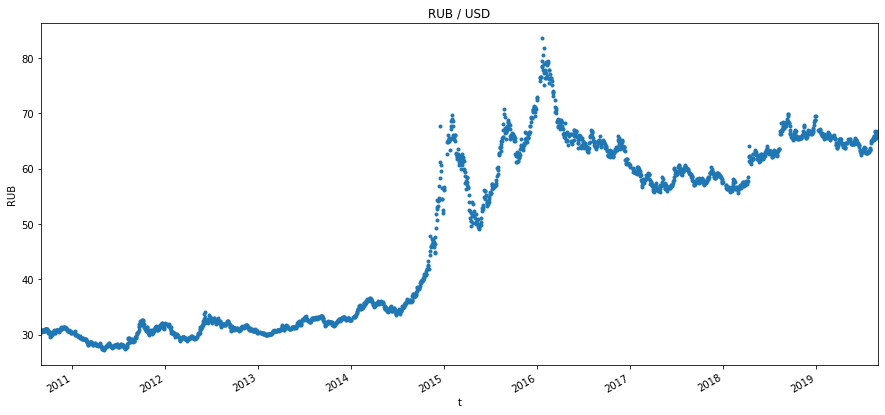

In [9]:
_ = usd_data['usd_curs'].plot(style='.', figsize=(15, 7), title='RUB / USD')
plt.ylabel('RUB')
plt.xlabel('t')

In [10]:
usd_data['usd_curs_diff'] = usd_data['usd_curs'].diff().fillna(0)
usd_data.head(2)

,usd_curs,usd_curs_diff
data,,
2010-09-01,30.8669,0.0000
2010-09-02,30.8001,-0.0668


Text(0.5, 0, 't')

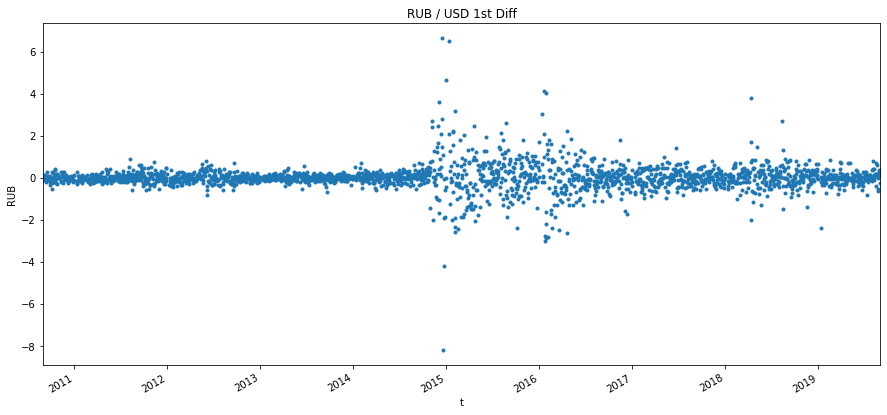

In [11]:
_ = usd_data.iloc[1:, -1].plot(style='.', figsize=(15, 7), title='RUB / USD 1st Diff')
plt.ylabel('RUB')
plt.xlabel('t')

In [12]:
eur_data = pd.read_excel('RC_F01_09_2010_T01_09_2019-2.xlsx', sep = ',', usecols=[1, 2], index_col=[0], parse_dates=[0])
eur_data.rename(columns={'curs': 'eur_curs'}, inplace=True)
eur_data.head(2)

,eur_curs
data,
2010-09-01,39.0127
2010-09-02,39.1654


In [13]:
eur_data.describe().T

,count,mean,std,min,25%,50%,75%,max
eur_curs,2228.0,57.575975,14.888395,38.4117,41.5068,60.64785,71.823025,91.1814


Text(0.5, 0, 't')

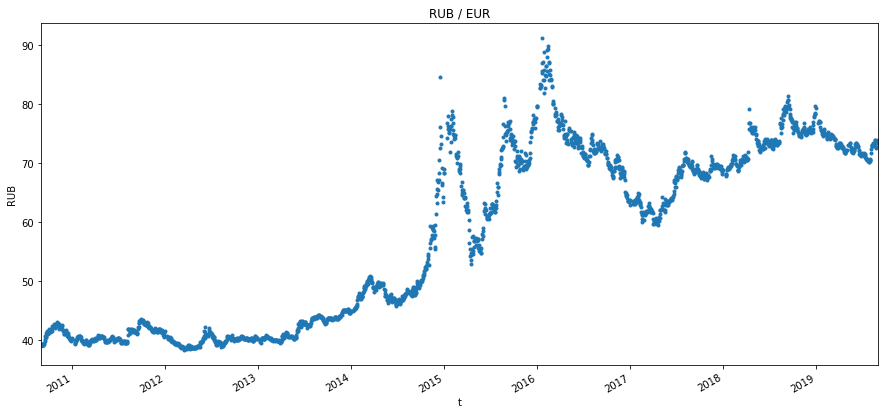

In [14]:
_ = eur_data['eur_curs'].plot(style='.', figsize=(15, 7), title='RUB / EUR')
plt.ylabel('RUB')
plt.xlabel('t')

In [15]:
eur_data['eur_curs_diff'] = eur_data['eur_curs'].diff().fillna(0)
eur_data.head(2)

,eur_curs,eur_curs_diff
data,,
2010-09-01,39.0127,0.0000
2010-09-02,39.1654,0.1527


Text(0.5, 0, 't')

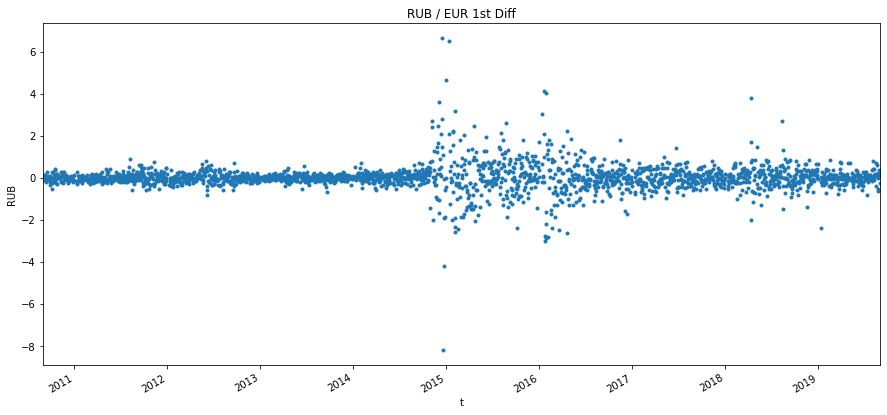

In [16]:
_ = usd_data.iloc[1:, -1].plot(style='.', figsize=(15, 7), title='RUB / EUR 1st Diff')
plt.ylabel('RUB')
plt.xlabel('t')

In [17]:
brent_data = brent_data.merge(usd_data, left_index=True, right_index=True)
brent_data = brent_data.merge(eur_data, left_index=True, right_index=True)
brent_data.head(2)

,brent,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,brent_diff,usd_curs,usd_curs_diff,eur_curs,eur_curs_diff
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.00,30.8669,0.0000,39.0127,0.0000
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0.52,30.8001,-0.0668,39.1654,0.1527


#### 3. Сделайте ее перрасчет (ресемплинг) в представление по неделям.

In [18]:
brent_data_w = brent_data.iloc[1:, [6, 11, 13, 15]].resample('W').mean().fillna(0)
brent_data_w.head(2)

,weekofyear,brent_diff,usd_curs_diff,eur_curs_diff
2010-09-05,35.0,0.083333,-0.058233,0.11260
2010-09-12,36.0,0.298000,0.040300,-0.03176


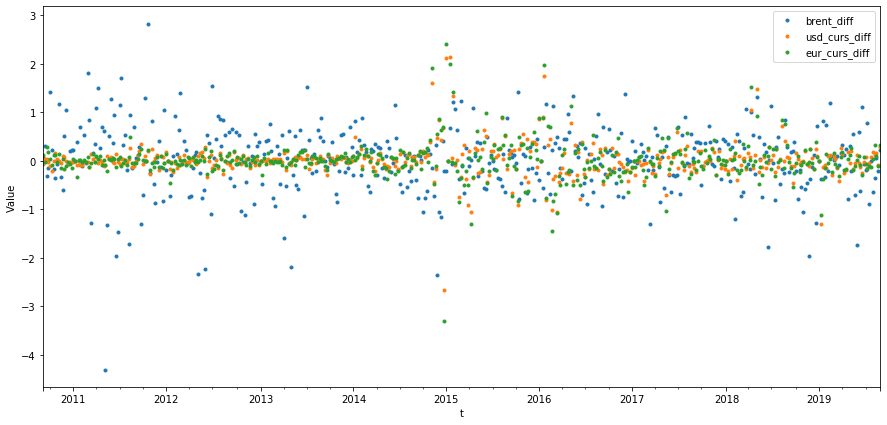

In [19]:
_ = brent_data_w['brent_diff'].plot(style='.', figsize=(15, 7))
_ = brent_data_w['usd_curs_diff'].plot(style='.', figsize=(15, 7))
_ = brent_data_w['eur_curs_diff'].plot(style='.', figsize=(15, 7))
plt.ylabel('Value')
plt.xlabel('t')
plt.legend()

#### 4. Постройте модель предсказания 1-й точки от текущей (h=1).

In [28]:
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def split_data(data, split_date):
    return data.loc[data.index.get_level_values(0) <= split_date].copy(), \
           data.loc[data.index.get_level_values(0) >  split_date].copy()

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [29]:
train, test = split_data(brent_data_w, '31-12-2017')

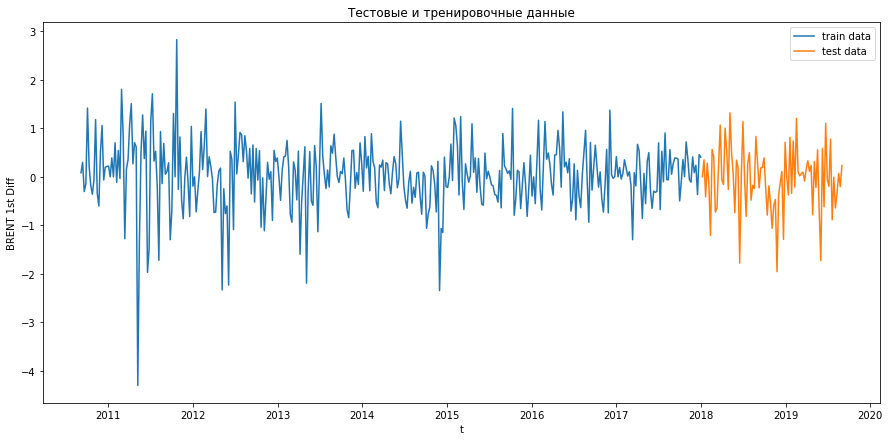

In [30]:
h = 1

X_train = train.iloc[:-h, :]
y_train = train['brent_diff'].values[h:]
X_test = test.iloc[:-h, :]
y_test = test['brent_diff'].values[h:]

plt.figure(figsize=(15, 7))
plt.xlabel('t')
plt.ylabel('BRENT 1st Diff')
plt.plot(train.index.get_level_values(0), train['brent_diff'], label='train data' )
plt.plot(test.index.get_level_values(0), test['brent_diff'], label='test data')
plt.title('Тестовые и тренировочные данные')
plt.legend()
plt.show()


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

params = {
    'n_estimators': np.array(range(10, 110, 10)),
    'max_depth': np.array(range(2, 7, 1)),
    'learning_rate': [0.01, 0.001, 0.01, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

search = GridSearchCV(regressor, param_grid=params, scoring='neg_mean_squared_error', cv=tscv, n_jobs=1)

search.fit(X_train, y_train)

print(search.best_params_)


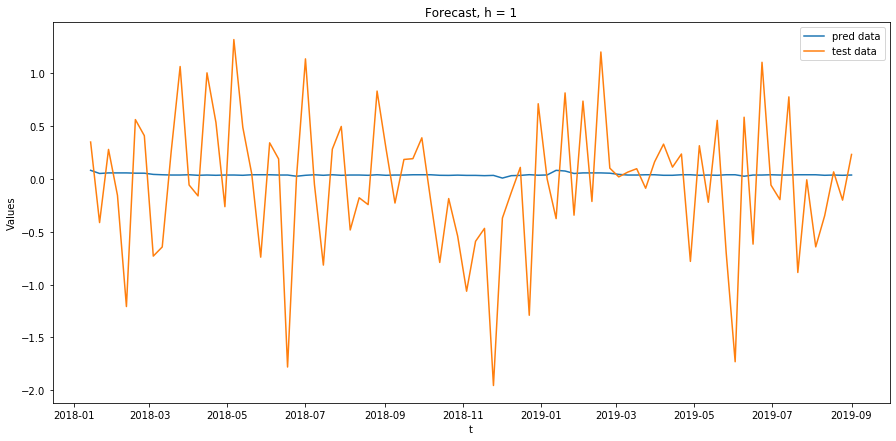

MSE (h = 1): 0.4228
MAE (h = 1): 0.491
R^2 (h = 1): -0.0158
MAPE (h = 1): inf%
RMSE (h = 1): 0.6502


In [49]:
search.best_estimator_.fit(X_train, y_train)

y_test_pred = search.best_estimator_.predict(X_test)

plt.figure(figsize=(15, 7))

plt.title('Forecast, h = 1')

plt.xlabel('t')
plt.ylabel('Values')
plt.plot(test.index[h:], y_test_pred, label='pred data')
plt.plot(test.index[h:], y_test, label='test data')

plt.legend()
plt.show()

print(f'MSE (h = 1): {np.round(mean_squared_error(y_test, y_test_pred), 4)}')
print(f'MAE (h = 1): {np.round(mean_absolute_error(y_test, y_test_pred), 4)}')
print(f'R^2 (h = 1): {np.round(r2_score(y_test, y_test_pred), 4)}')
print(f'MAPE (h = 1): {np.round(mean_absolute_percentage_error(y_test, y_test_pred), 4)}%')
print(f'RMSE (h = 1): {np.round(root_mean_squared_error(y_test, y_test_pred), 4)}')


#### 5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.